### Setup & Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Kannada-MNIST/test.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/sample_submission.csv


In [2]:
path = '../input/Kannada-MNIST/'

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Data loading & inspection

##### helper functions

In [5]:
"""
helper function to show a number of randomly selected images 
belonging either to a specified label or selected across all labels
"""

def show_random_images(images, num=10, label=None):

    # generating images' subsample if label specified
    if label is not None:
        images = images[images.label == label]
    
    fig, axs = plt.subplots(num, figsize=(1.25, num * 2.5))
    
    for i in range(num):
    
        rnd = np.random.randint(len(images))
    
        # getting image data and splitting between label and pixels' vector
        img_data = np.array(images.iloc[rnd], dtype='uint8')    
        img_label = img_data[0]
        img_pixels = img_data[1:]
        
        # reshaping image to 2D array
        img_shape = (int(np.sqrt(img_pixels.shape[0])), int(np.sqrt(img_pixels.shape[0])))
        img_array = img_pixels.reshape(img_shape)
        
        title = 'Image {} / labelled {}'.format(rnd, img_label)
        
        axs[i].imshow(img_array, alpha=0.66, cmap='gray')
        axs[i].set_title(title)

#### "train.csv"

In [6]:
train_data = pd.read_csv(path + 'train.csv')
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# checking labels distribution

train_data.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

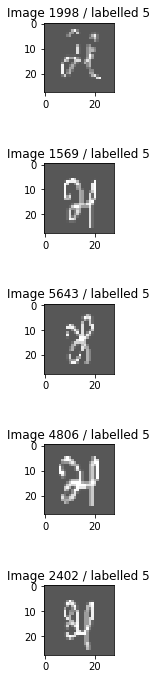

In [8]:
show_random_images(train_data, num=5, label=5)

#### "Dig-MNIST.csv"

In [9]:
dig_data = pd.read_csv(path + 'Dig-MNIST.csv')
dig_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# checking labels distribution

dig_data.label.value_counts()

7    1024
6    1024
5    1024
4    1024
3    1024
2    1024
9    1024
1    1024
8    1024
0    1024
Name: label, dtype: int64

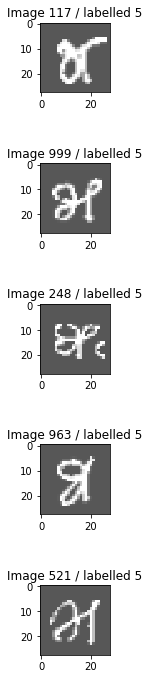

In [11]:
show_random_images(dig_data, num=5, label=5)

### Data preparation

##### Helper functions

In [12]:
# helper function to show randomly selected image from 2D images array

def show_random_image(imgset):
    
    rnd = np.random.randint(imgset.shape[0])
    imgarray = imgset[rnd]
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(imgarray, cmap='gray')

#### Preparing "train" images

In [13]:
# preparing train image labels using 'one-hot' encoding

train_labels = to_categorical(train_data.label)
train_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
train_labels.shape

(60000, 10)

In [15]:
# preparing train images array ('flat' image vectors)

train_images = np.array(train_data.drop(columns='label'))
train_images.shape

(60000, 784)

In [16]:
# preparing 2D train images array (reshaping original 'flat' image vectors array)

n_images = train_images.shape[0]
dim = int(np.sqrt(train_images.shape[1]))

train_images_2D = train_images.reshape(n_images, dim, dim)
train_images_2D.shape

(60000, 28, 28)

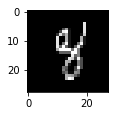

In [17]:
show_random_image(train_images_2D)

In [18]:
# normalizing "train" images

train_images = train_images / 255

#### Preparing "Dig-MNIST" images

In [19]:
# preparing dig-mnist image labels using 'one-hot' encoding

dig_labels = to_categorical(dig_data.label)
dig_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [20]:
dig_labels.shape

(10240, 10)

In [21]:
# preparing train images array ('flat' image vectors)

dig_images = np.array(dig_data.drop(columns='label'))
dig_images.shape

(10240, 784)

In [22]:
# preparing 2D dig-mnist images array (reshaping original 'flat' image vectors array)

n_images = dig_images.shape[0]
dim = int(np.sqrt(dig_images.shape[1]))

dig_images_2D = dig_images.reshape(n_images, dim, dim)
dig_images_2D.shape

(10240, 28, 28)

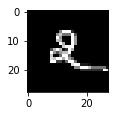

In [23]:
show_random_image(dig_images_2D)

In [24]:
# normalizing "Dig-MNIST" images

dig_images = dig_images / 255

### Modelling

#### Loading test images and sample submission

In [25]:
test_data = pd.read_csv(path + 'test.csv', index_col='id')
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
submission = pd.read_csv(path + 'sample_submission.csv', index_col='id')
submission

,label
id,
0,5
1,5
2,5
3,5
4,5
...,...
4995,5
4996,5
4997,5


#### Preparing test images

In [27]:
# preparing test images array ('flat' image vectors)

test_images = np.array(test_data)
test_images.shape

(5000, 784)

In [28]:
# normalizing "test" images

test_images = test_images / 255

#### Setting (hyper)parameters

In [29]:
# setting input dimensionality - "flat" image vectors
input_dim = train_images.shape[1]

In [30]:
# setting optimization parameters
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

In [31]:
# setting training parameters
epochs = 100
batch_size = 1024

early_stop = EarlyStopping(monitor='val_loss', 
                           min_delta=0, 
                           patience=3, 
                           verbose=True, 
                           mode='auto', 
                           baseline=None, 
                           restore_best_weights=False)

callbacks = [early_stop]

In [32]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [33]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 102,714
Trainable params: 102,714
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(train_images, train_labels, 
          batch_size=batch_size, epochs=epochs, 
          verbose=True, 
          callbacks=callbacks, 
          validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 3s 58us/step - loss: 0.7800 - accuracy: 0.7959 - val_loss: 0.1995 - val_accuracy: 0.9598
Epoch 2/100
54000/54000 [==============================] - 3s 53us/step - loss: 0.2023 - accuracy: 0.9486 - val_loss: 0.1081 - val_accuracy: 0.9708
Epoch 3/100
54000/54000 [==============================] - 3s 52us/step - loss: 0.1336 - accuracy: 0.9629 - val_loss: 0.0971 - val_accuracy: 0.9737
Epoch 4/100
54000/54000 [==============================] - 3s 53us/step - loss: 0.1066 - accuracy: 0.9699 - val_loss: 0.0807 - val_accuracy: 0.9762
Epoch 5/100
54000/54000 [==============================] - 3s 54us/step - loss: 0.0909 - accuracy: 0.9734 - val_loss: 0.0815 - val_accuracy: 0.9768
Epoch 6/100
54000/54000 [==============================] - 3s 53us/step - loss: 0.0780 - accuracy: 0.9778 - val_loss: 0.0852 - val_accuracy: 0.9768
Epoch 7/100
54000/54000 [==============================] - 3s 5

#### Model evaluation

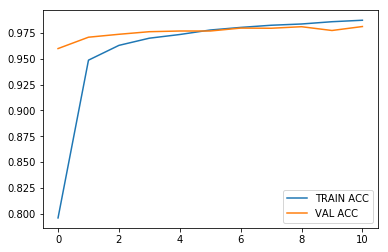

In [36]:
# showing history of 'accuracy'

plt.figure()
plt.plot(model.history.history['accuracy'], label='TRAIN ACC')
plt.plot(model.history.history['val_accuracy'], label='VAL ACC')
plt.legend()
plt.show()

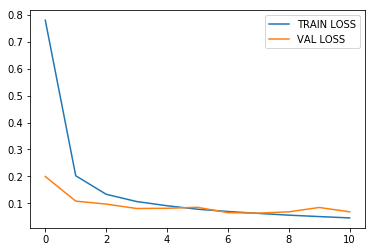

In [37]:
# showing history of 'loss'

plt.figure()
plt.plot(model.history.history['loss'], label='TRAIN LOSS')
plt.plot(model.history.history['val_loss'], label='VAL LOSS')
plt.legend()
plt.show()

In [38]:
# making predictions for "train" data (in-sample check)

pred_train = model.predict_classes(train_images)
pred_train.shape

(60000,)

In [39]:
hits = (pred_train == train_data.label)
print('Hits: {}, i.e. {:.2f}%'.format(hits.sum(), hits.sum() / pred_train.shape[0] * 100))

Hits: 59274, i.e. 98.79%


In [40]:
miss = (pred_train != train_data.label)
print('Misses: {}, i.e. {:.2f}%'.format(miss.sum(), miss.sum() / pred_train.shape[0] * 100))

Misses: 726, i.e. 1.21%


In [41]:
# evaluating model on "train" data

eval_metrics = model.evaluate(x=train_images, y=train_labels, 
                              batch_size=batch_size, verbose=True, callbacks=callbacks)
pd.DataFrame(eval_metrics, index=model.metrics_names, columns=['metric'])

60000/60000 [==============================] - 0s 8us/step


,metric
loss,0.042962
accuracy,0.987900


In [42]:
# evaluating model on "Dig-MNIST" data

eval_metrics = model.evaluate(x=dig_images, y=dig_labels, 
                              batch_size=batch_size, verbose=True, callbacks=callbacks)
pd.DataFrame(eval_metrics, index=model.metrics_names, columns=['metric'])

10240/10240 [==============================] - 0s 11us/step


,metric
loss,2.340725
accuracy,0.642480


#### Making predictions

In [43]:
# setting the optimal number of epochs
epochs = 8

# re-training the model on full train dataset
model.fit(train_images, train_labels, 
          batch_size=batch_size, epochs=epochs, 
          verbose=True)

Epoch 1/8
60000/60000 [==============================] - 3s 53us/step - loss: 0.0423 - accuracy: 0.9876
Epoch 2/8
60000/60000 [==============================] - 3s 53us/step - loss: 0.0372 - accuracy: 0.9895
Epoch 3/8
60000/60000 [==============================] - 3s 53us/step - loss: 0.0341 - accuracy: 0.9905
Epoch 4/8
60000/60000 [==============================] - 3s 52us/step - loss: 0.0312 - accuracy: 0.9911
Epoch 5/8
60000/60000 [==============================] - 3s 52us/step - loss: 0.0287 - accuracy: 0.9919
Epoch 6/8
60000/60000 [==============================] - 3s 53us/step - loss: 0.0260 - accuracy: 0.9930
Epoch 7/8
60000/60000 [==============================] - 3s 53us/step - loss: 0.0237 - accuracy: 0.9940
Epoch 8/8
60000/60000 [==============================] - 3s 53us/step - loss: 0.0213 - accuracy: 0.9942


In [44]:
# making predictions on "test" data

pred_test = model.predict_classes(test_images)

In [45]:
submission.label = pred_test
submission.to_csv('submission.csv')